# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Exploratory Data Analysis (EDA) merupakan suatu pendekatan dalam analisis data untuk menemukan tren, pola, atau menemukan asumsi dengan bantuan dari statistical summary dan representasi grafik. EDA mampu memberikan gambaran yang lebih baik untuk memahami variabel-variabel dalam suatu dataset serta hubungan antar variabel tersebut. Adapun tahapan yang perlu dilakukan dalam EDA adalah sebagai berikut.
1. Data Understanding
2. Data Preparation
3. Analyzing (Statictical summary, univariate & multivariate analysis)

In [ ]:
import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
df = pd.read_csv("dataset.csv")

# Data Understanding

In [ ]:
#Show top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Show the dimensionality of the DataFrame
df.shape

(7043, 21)

**Insight**:

DataFrame terdiri dari 7043 pengamatan/sampel dengan 21 variabel.

In [ ]:
#Show columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Show data info and check for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insight**:
- Tidak ada variabel yang mengandung value kosong.
- Variabel SeniorCitizen seharusnya bertipe object karena angka 0 dan 1 merupakan label kategorik.
- Variabel TotalCharges seharusnya bertipe float64.

# Data Preparation

In [ ]:
#Convert datatype of SeniorCitizen into object
df.SeniorCitizen = df.SeniorCitizen.map({0:'No',1:'Yes'})

In [ ]:
#Convert datatype of TotalCharges into float
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))

In [ ]:
#Show updated data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Make new variables that contain groupings of numeric and categorical variables
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in 'customerID']
nums=[i for i in df.columns if df[i].dtypes != 'object']

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis.

In [ ]:
#Show count of each category of categorical variables
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dty

# Statistical summary

Selanjutnya kita munculkan ringkasan statistik dataframe melalui pendekatan numerik maupun kategorik.

### Pendekatan numerik

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


**Insight**:
- Pada variabel tenure dan MonthlyCharges, nilai minimal dan maksimal nya berbeda cukup jauh jika dibandingkan dengan mean/median nya. Namun, jika dibandingkan dengan Q1 maupun Q3, nilai minimal dan maksimal ini masih berada dalam batas wajar.
- Pada variabel TotalCharges, nilai minimal dan maksimal tidak berada dalam batas wajar karena sangat berbeda dengan nilai mean/median maupun nilai Q1 dan Q3. Hal ini memungkinkan adanya indikasi kesalahan input data.
- Jika MonthlyCharges adalah charge yang diterima dari klien per bulan dan TotalCharges adalah charge yang diterima per tahun, maka angka 8684,80 sebagai jumlah maksimal pada variabel TotalCharges sebenarnya kurang masuk akal. Hal ini disebabkan karena klien paling lama berlangganan selama 72 bulan sedangkan jumlah MonthlyCharges maksimum adalah 118,75 sehingga seharusnya TotalCharges maksimum adalah 8.550.
- Nilai mean dan median pada masing-masing variabel cukup memiliki perbedaan yang signifikan.

### Pendekatan kategorik

In [ ]:
df[cats].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Insight**:
- Jumlah unique values pada masing-masing variabel dapat dikatakan masuk akal.
- Distribusi pada variabel SeniorCitizen, Dependents, PhoneService, dan Churn terlalu timpang pada salah satu kategori.

# Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*.

### Boxplot

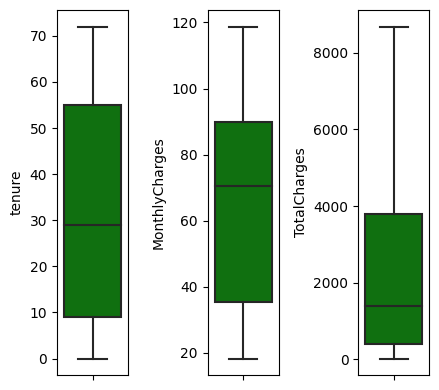

In [ ]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

**Insight**:
- Tidak terdeketsi adanya outlier dalam variabel tenure, MonthlyCharges, maupun TotalCharges.
- Jika diamati menggunakan boxplot, distribusi dari ketiga variabel di atas adalah positive/right skewed.

### Histplot

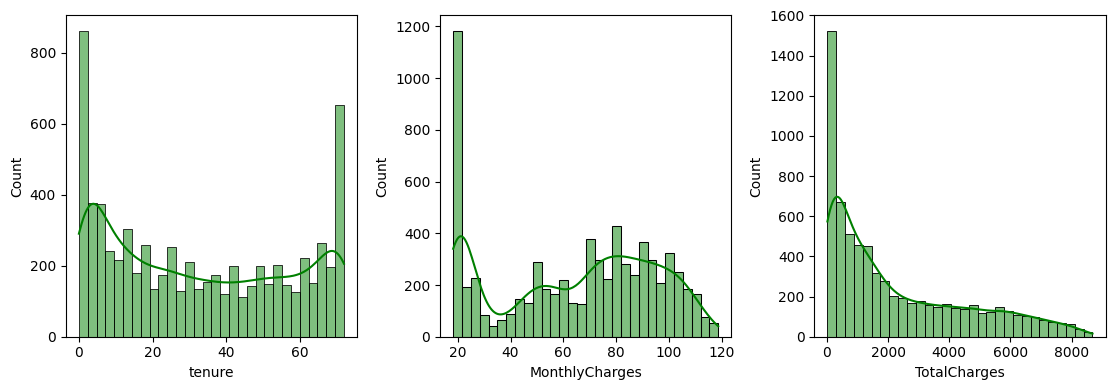

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

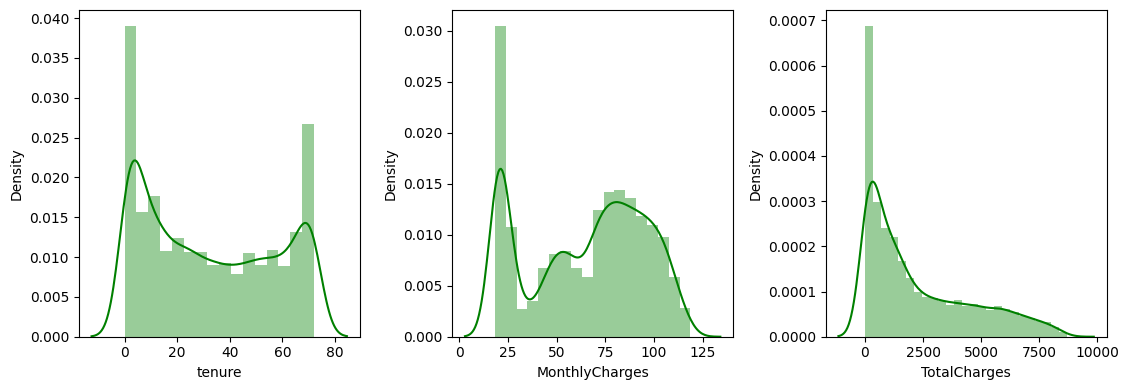

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

**Insight**:
- Jika diamati menggunakan histplot, distribusi data dari tenure dan MonthlyCharges adalah bimodal karena memiliki dua puncak data, sedangkan distribusi data dari TotalCharges adalah positive skewed karena nilai median lebih rendah daripada nilai mean.
- Lonjakan pertama pada tenure kemungkinan dapat terjadi pada orang yang baru menjadi pelanggan, sedangkan lonjakan kedua kemungkinan dapat terjadi pada pelanggan setia yang sudah berlangganan sejak awal perusahaan berdiri.
- Lonjakan pertama pada MonthlyCharges kemungkinan terjadi pada orang baru karena mereka baru ingin mencoba menggunakan produk perusahaan. Sementara lonjakan kedua pada MonthlyCharges kemungkinan terjadi pada pelanggan setia yang sudah lama menggunakan produk perusahaan. Mereka sudah sangat percaya pada perusahaan sehingga biaya bulanan yang mereka keluarkan juga tidak sedikit.

### Countplot (categorical)

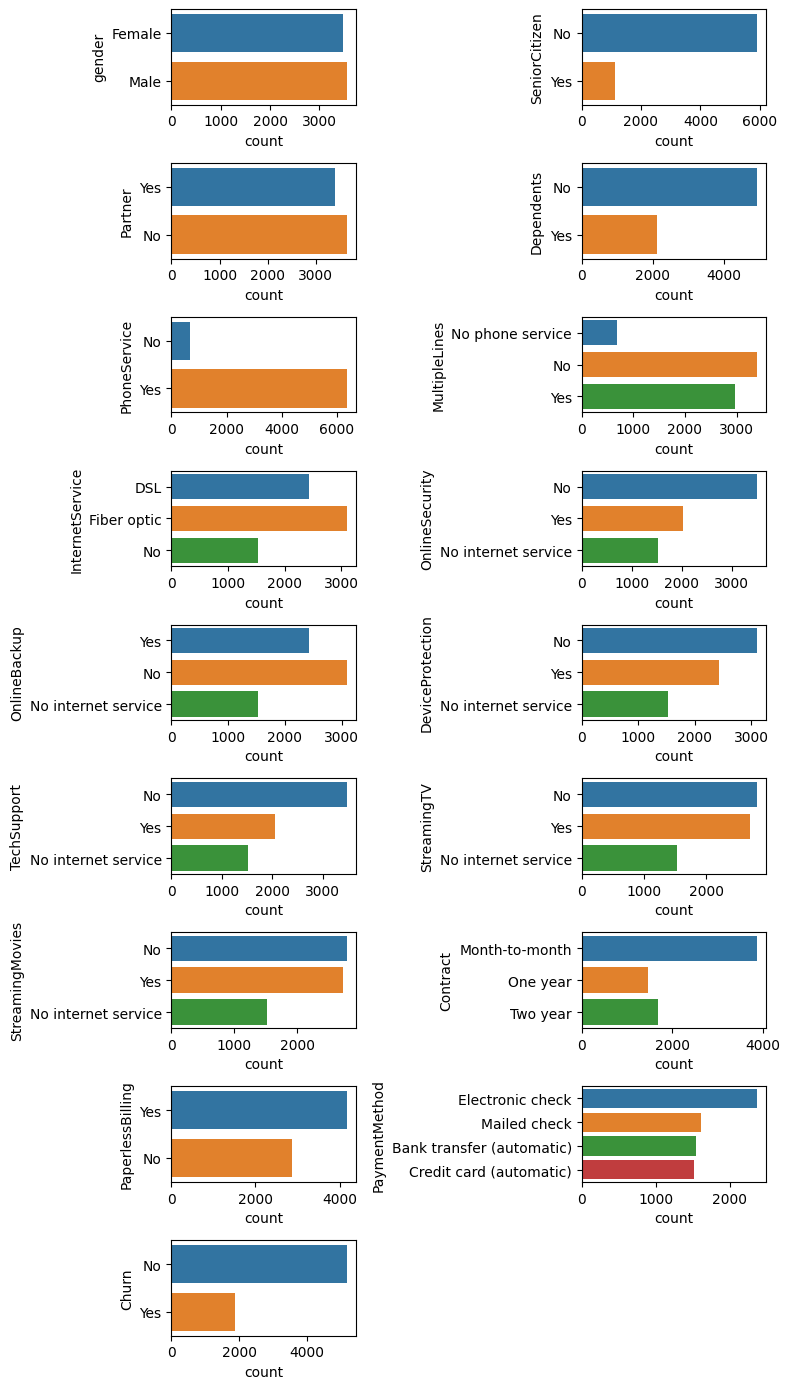

In [ ]:
plt.figure(figsize=(8, 14))
for i in range(0, len(cats)):
    plt.subplot(9, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v')
    plt.tight_layout()

**Insight**:

Ketimpangan pada variabel SeniorCitizen, Dependents, dan PhoneService merupakan indikasi ketidakgunaan feature. Sedangkan ketimpangan pada variabel Churn, dimana variabel ini merupakan target variable, dapat membuat proses learning gagal sehingga perlu dilakukan penanganan terhadap data imbalance terlebih dahulu sebelum dilakukan modeling.

# Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

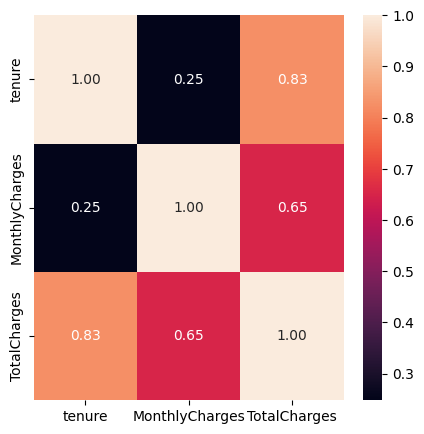

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Insight**:

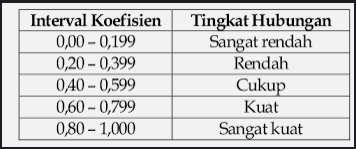

Berdasarkan kategori koefisien korelasi di atas, dapat disimpulkan beberapa hal sebagai berikut.
- Variabel tenure dan MonthlyCharges berkorelasi rendah. Hal ini dapat dikatakan bahwa kedua variabel tidak memiliki hubungan yang signifikan sehingga model linear tidak dapat digunakan.
- Variabel MonthlyCharges dan TotalCharges berkorelasi kuat, sedangkan variabel tenure dan TotalCharges berkorelasi sangat kuat.

### Category Plot

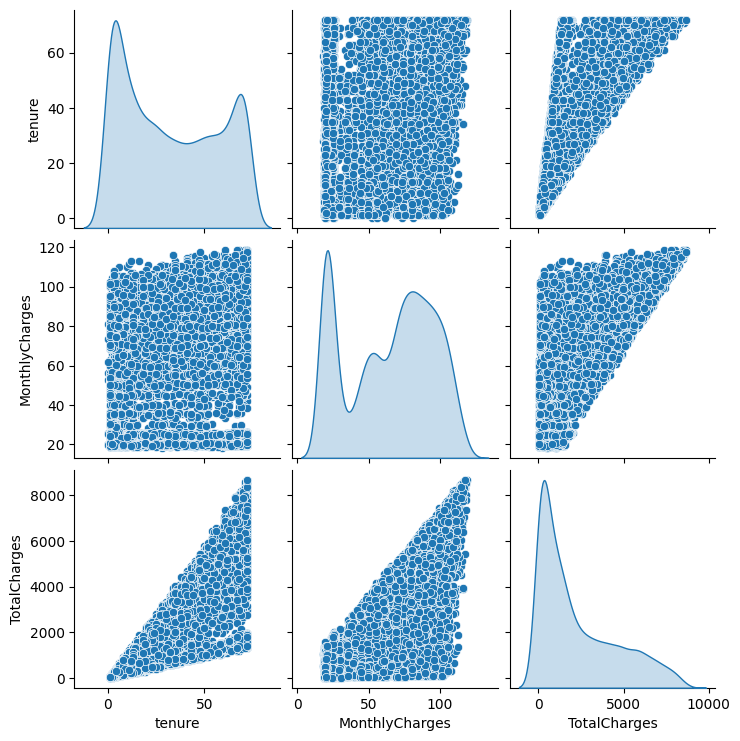

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Insight**:

Scatter plot dari masing-masing variabel tidak menunjukkan adanya cluster yang cukup jelas sehingga tidak bisa menjadi petunjuk untuk membuat feature baru.

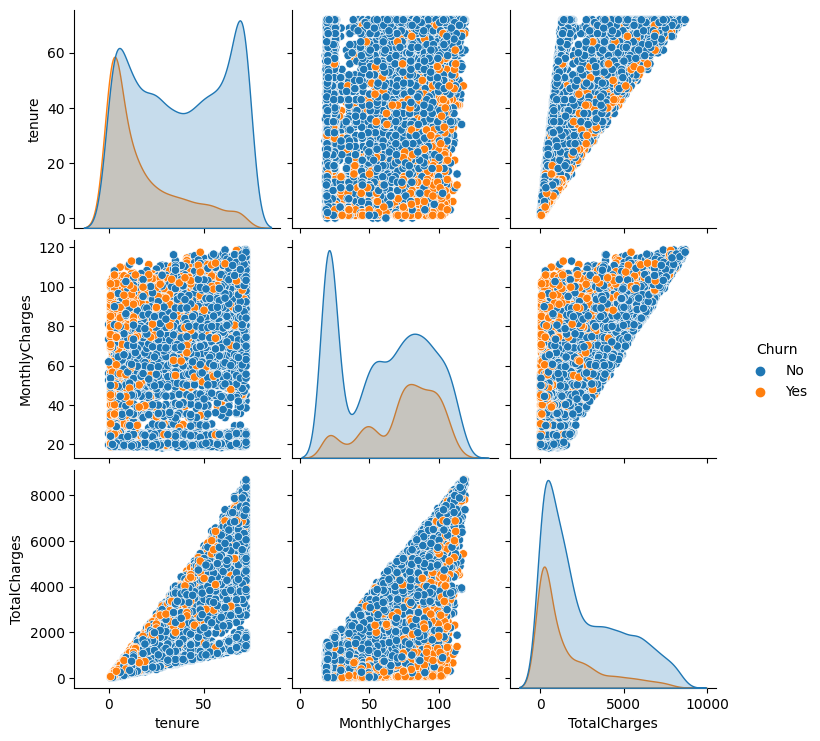

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

**Insight**:

Scatter plot dari masing-masing variabel tidak menunjukkan adanya target (Churn) yang terpisah sehingga belum dapat menjadi indikasi kombinasi feature yang baik.